# SME Visualization with Plotly Ternary Plots

With the smothering blanket of COVID-19 cases in the U.S., there has been a huge push to expand the Paycheck Protection Program to support small businesses. Rightly so, since small and medium businesses are the driving forces of the economy. Not only do these types of businesses contribute at least 50% of GDP (AZCentral) and consitute about 99% of all businesses globally (EBRD), they provide a majority of all US jobs, inspire innovation, and promote healthy market competition. Collectively, these businesses are called "Small and Medium-sized Businesses" (SMBs), "Small and Medium-sized Enterprises" (SMEs), and "Micro, Small, and Medium-sized Enterprises" (MSMEs). This notebook will simply refer to them as SMEs, the most popular designation.

The Small Business Administration (SBA) does not have a rigid definition of what constitutes a "small" or "medium"-sized business since it depends on the industry (SBA). However, common standards in other countries lend a broad benchmark in terms of employees:
- Micro: up to 10 employees
- Small: anywhere from 10 to 100 employees
- Medium: anywhere from 100 to 500 employees
- Large: over 500 employees

This notebook will be examining the Statistics of U.S. Businesses (SUSB) 2017 data; this summarizes business data at the state level. In order to visualize the distributions of SMEs, I will be utilizing a nice technique called the ternary plot.

# Ternary Plot Visualization Technique

Ternary plots, also known as tringle plots or simplex plots, are triangular plots where data points are proportions of three variables that sum to a constant and displayed on the plot in barycentric coordinates. Each point on the triangle represents a variable; going toward that point represents increasing compositional concentration of that variable. While its most popular uses have been in the physical sicences, especially to visualize compositions of materials or states of matter, the ternary plot has become a little more popular in the data science community for some instances where proportional bar graphs aren't enough to drive a point on relative composition. While bar graphs use the dimension of lines, the ternary plot takes advantage of space to emphasize how datapoints may favor one variable relative to the other variables. Some examples at http://datavizcatalogue.com/blog/ternary-graphs-triangular-plots/ demonstrate additional examples of how ternary plots are used in data science, such as composition of retweets, likes, and replies for a tweet and vote breakdowns among three candidates.

Since our dataset contains a few ways of framing the dataset into three variables ((micro, small, medium), (small, medium, large)), using a ternary plot is an excellent way of visualising the distribution of SMEs.

Of course, ternary plots have a niche use, since they can only represent three variables (and possibly a fouth for intensity). However, if there happens to be data that can be broken into three categories, a ternary plot can offer a fresh perspective over traidtional bar plots.

# The Plotly Library

The plotly library is a free and open-source graphing library that is able to generate a wide range of plots. The plotly Python library is built on the Plotly JavaScript library (plotly.js), allowing for easy use on jupyter notebooks, standalone HTML files, and Python-built web applications using Dash. The flexible and accessible nature of the plotly library makes it a good candidate for creating ternary plots.

### Plotly Express

In order to display a ternary plot in python, I will be using the Plotly Express module of the plotly library. Plotly Express has function specifically for plotting ternary charts, scatter_ternary, making it very appropriate for this dataset. Using the scatter_ternary function allows for manipulation in a similar style to matplotlib and adds automatic interactivity, making it excellent for pinning down specific data points.

Plotly Express certainly isn't perfect (as this article from Towards Data Science demonstrates: https://towardsdatascience.com/plotly-express-the-good-the-bad-and-the-ugly-dc941649687c). Due to its simplified structure and relative newness, graphs can have inconvenient glitches occasionally with little online rescources to help. Despite this, many of the essential functions for exploratory analysis using ternary charts is fine for the scope of this notebook.

### Plotly Installation

In order to install the plotly library using pip, type the following command: 
$ pip install plotly==4.12.0

In order to install the plotly library using conda, type the following command: 
$ conda install -c plotly plotly=4.12.0

# Plotting The Data

The following are the libraries needed to run the code:

In [8]:
import pandas as pd
import plotly.express as px

The data can be accessed at https://www.census.gov/data/tables/2017/econ/susb/2017-susb-annual.html, listed as "U.S. & states, totals   [<1.0 MB]" under "U.S. and States."

It initially comes in the form of an xlsx file, so resave as a csv file and put it in the assets folder in the same directory as this notebook.

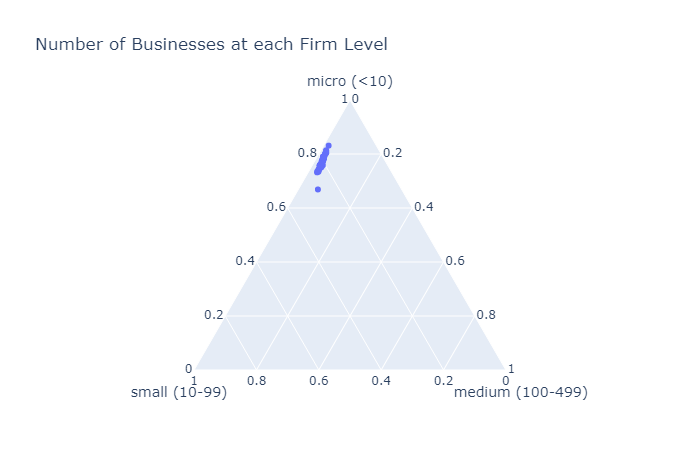

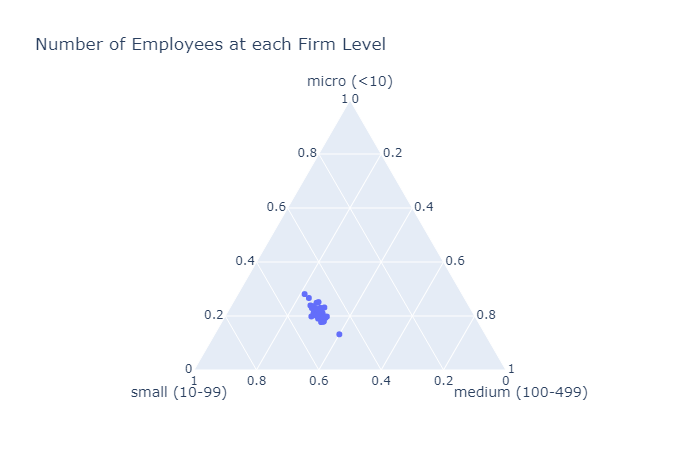

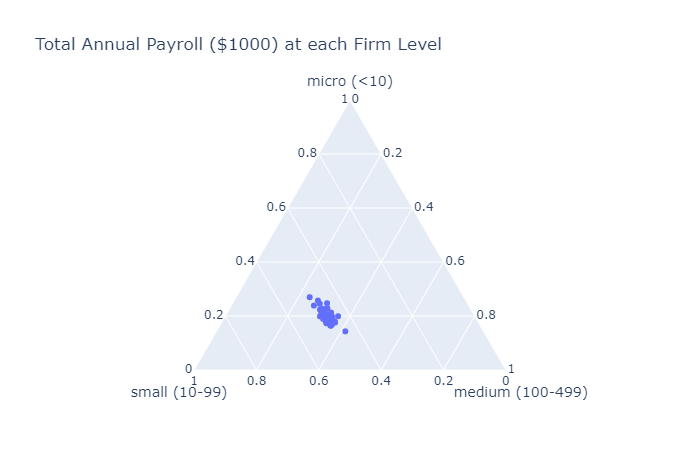

In [9]:
#load in the csv file and remove unnecessary headers
state_firm_level = pd.read_csv('assets/us_state_totals_2017.csv', skiprows = 6)
state_firm_level = state_firm_level[11:]


#specify the desired columns, rename the columns to pythonic variables and reset the index
state_firm_level = state_firm_level[['GEOGRAPHIC AREA DESCRIPTION', 'ENTERPRISE EMPLOYMENT SIZE', 'NUMBER OF FIRMS','EMPLOYMENT','ANNUAL PAYROLL ($1,000)']].reset_index(drop = True)
state_firm_level.rename(columns = {'GEOGRAPHIC AREA DESCRIPTION':'state', 'ENTERPRISE EMPLOYMENT SIZE':'firm_level', 'NUMBER OF FIRMS':'firm_size', 'EMPLOYMENT':'num_employee','ANNUAL PAYROLL ($1,000)':'payroll ($1000)'},inplace = True)

#We are only looking at 3 levels of businesses for this exploration: mirco (<10), small (10-100), and medium (100-500). We will therefore filter out all the extraneous labels.
msme = state_firm_level[~state_firm_level['firm_level'].isin(['01:  Total', '05:  <20','08:  <500', '09:  500+'])]

#relabel so that each "bin" refers back to the 3 previously defined levels and reset index
msme = msme.replace({'02:  <5':'micro (<10)', '03:  5-9':'micro (<10)','04:  10-19': 'small (10-99)','06:  20-99': 'small (10-99)','07:  100-499':'medium (100-499)'}).reset_index(drop=True)

#typecast firm_size and num_employee into int
msme['firm_size'] = msme['firm_size'].str.replace(',', '').astype(int)
msme['num_employee'] = msme['num_employee'].str.replace(',', '').astype(int)
msme['payroll ($1000)'] = msme['payroll ($1000)'].str.replace(',', '').astype(int)

#groupby state and firm_level, then sum the values to reduce the rows
msme = msme.groupby(['state','firm_level']).sum()

#restructure the dataframe such that the firm levels are the columns and the numeric variables are indices
firm_size = msme[['firm_size']].stack().unstack(1).droplevel(1)[['micro (<10)','small (10-99)','medium (100-499)']].reset_index()
num_employees = msme[['num_employee']].stack().unstack(1).droplevel(1)[['micro (<10)','small (10-99)','medium (100-499)']].reset_index()
payroll = msme[['payroll ($1000)']].stack().unstack(1).droplevel(1)[['micro (<10)','small (10-99)','medium (100-499)']].reset_index()

#plot on a ternary plot
fig = px.scatter_ternary(firm_size, 
                         a='micro (<10)', 
                         b='small (10-99)', 
                         c='medium (100-499)',
                         hover_name = 'state',
                         title = 'Number of Businesses at each Firm Level'
                        )
fig.show("png")

fig = px.scatter_ternary(num_employees,
                         a='micro (<10)',
                         b='small (10-99)',
                         c='medium (100-499)',
                         hover_name = 'state',
                         title = 'Number of Employees at each Firm Level'
                        )
fig.show("png")

fig = px.scatter_ternary(payroll,
                         a='micro (<10)',
                         b='small (10-99)',
                         c='medium (100-499)',
                         hover_name = 'state',
                         title = 'Total Annual Payroll ($1000) at each Firm Level'
                        )
fig.show("png")

### Additional Features

As you can see from the above graphs, we can adjust the titles, the labels of vertices, and data point hovertext labels. 

We can also change marker symbol, marker size, and color. This notebook will show each instance on separate graphs.

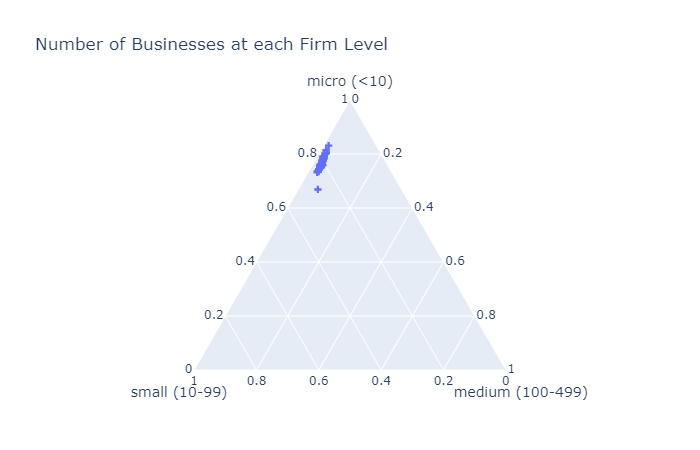

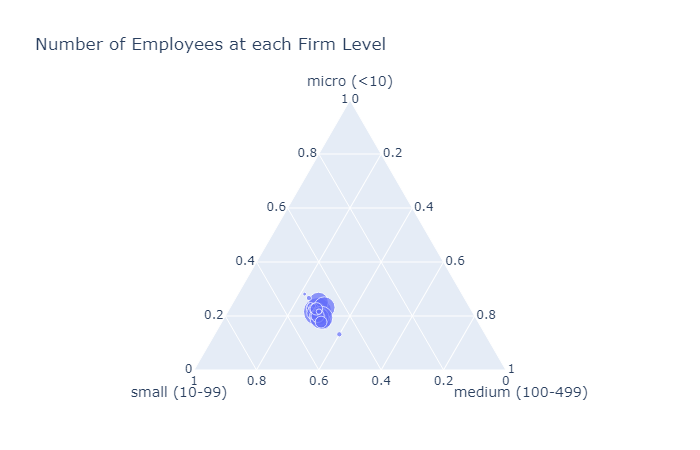

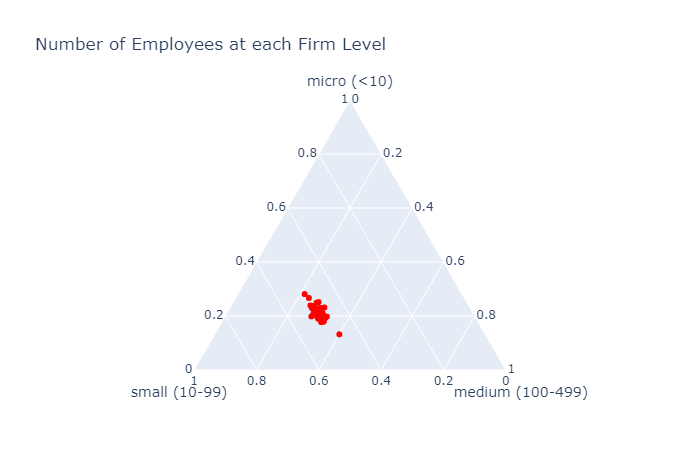

In [10]:
#sum of totals for each graph
firm_size['total'] = firm_size['micro (<10)'] + firm_size['small (10-99)'] + firm_size['medium (100-499)']
num_employees['total'] = num_employees['micro (<10)'] + num_employees['small (10-99)'] + num_employees['medium (100-499)']
payroll['total'] = payroll['micro (<10)'] + payroll['small (10-99)'] + payroll['medium (100-499)']

#change marker symbol
fig = px.scatter_ternary(firm_size, 
                         a='micro (<10)', 
                         b='small (10-99)', 
                         c='medium (100-499)',
                         hover_name = 'state',
                         title = 'Number of Businesses at each Firm Level'
                        )
fig.update_traces(marker_symbol='cross', selector=dict(type='scatterternary'))
fig.show("png")

#change marker size
fig = px.scatter_ternary(num_employees,
                         a='micro (<10)',
                         b='small (10-99)',
                         c='medium (100-499)',
                         hover_name = 'state',
                         title = 'Number of Employees at each Firm Level',
                         size = 'total'
                        )
fig.show("png")

#change color
fig = px.scatter_ternary(num_employees,
                         a='micro (<10)',
                         b='small (10-99)',
                         c='medium (100-499)',
                         hover_name = 'state',
                         title = 'Number of Employees at each Firm Level'
                        )
fig.update_traces(marker_color='red', selector=dict(type='scatterternary'))
fig.show("png")

Cited Works:
- Statistics of U.S. Businesses. U.S. Census Bureau. https://www.census.gov/programs-surveys/susb.html
- Ternary Plots in Python. Plotly. https://plotly.com/python/ternary-plots/
- Table of size standards. SBA. https://www.sba.gov/document/support--table-size-standards
- "Why small businesses matter." EBRD. https://www.ebrd.com/what-we-do/sectors-and-topics/why-small-businesses-matter.html
- Vicki Wright. "Reasons Why Small Businesses are Important." AZCentral. https://yourbusiness.azcentral.com/reasons-small-businesses-important-1830.html
- Severino Ribecca. "Further Exploration #8 – Triangular Plots." The Data Visualisation Catalogue Blog. http://datavizcatalogue.com/blog/ternary-graphs-triangular-plots/ 
- Reilly Meinert. "Plotly Express: the Good, the Bad, and the Ugly." Towards Data Science. https://towardsdatascience.com/plotly-express-the-good-the-bad-and-the-ugly-dc941649687c